# Zomato Data Analysis Project 

## Step-1 : Importing libraries

###### pandas for data manipulation and analysis 
###### numpy for numerical operations
###### matplotlib and seaborn for data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step-2 : Creating the data frame

In [2]:
data = pd.read_csv("ZomatoData.csv")

In [3]:
data.head(5)


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


## Step-3 : Data Cleaning and Preprocessing
#### (a) convert data type of column - rate 

In [4]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)
data['rate']= data['rate'].apply(handleRate)
data.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


#### (b) Check for missing values 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Step-4 : Exploratory Data Analysis, Visualisations and Insights 

### (1) Types of restaurant 

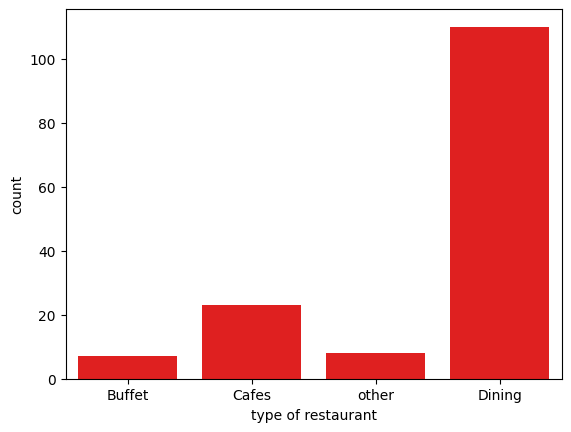

In [8]:
sns.countplot(x=data['listed_in(type)'], color ="red")
plt.xlabel("type of restaurant")
plt.show()

#### conclusion - majority of the restaurants falls in dining category.

### (2) Votings according to restaurant type 

Text(0, 0.5, 'Votes')

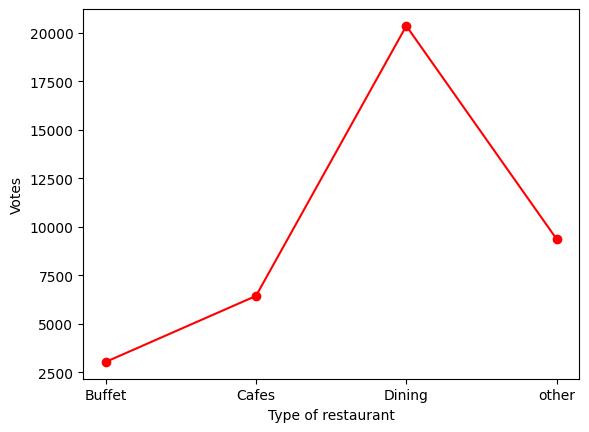

In [31]:
grouped_data = data.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes": grouped_data})
plt.plot(result, c= "red", marker ="o")
plt.xlabel("Type of restaurant", size = 10)
plt.ylabel("Votes", size = 10)

#### conclusion- Dining restaurants has recieved maximum votes 

### (3) Ratings of Majority of restaurants

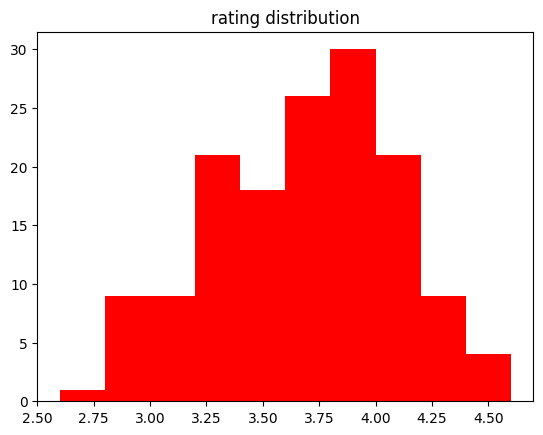

In [40]:
plt.hist(data["rate"],bins =10, color= 'red')
plt.title("rating distribution")
plt.show()


#### conclusion- the majority restaurant recieves rationg from 3.5 - 4.0

### (4) Spendings on online and offline orders

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

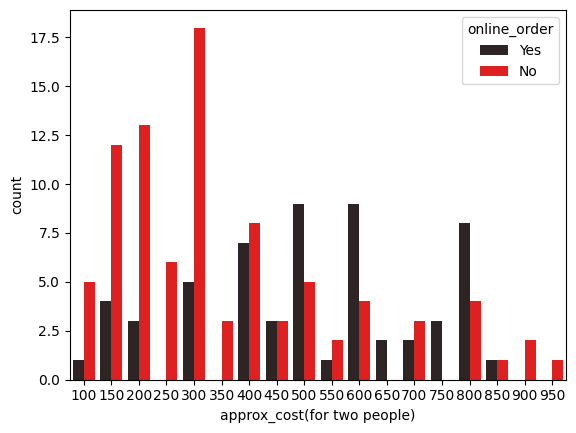

In [54]:
couple_data = data['approx_cost(for two people)']
online= data['online_order']
sns.countplot(x= couple_data,hue = online, palette ='dark:red')


#### conclusion - most of the offline orders (for 2 people) amounts to Rs.300 approx.
#### and most of the online orders (for 2 people) amounts between Rs.500 - Rs.600.

### (5) Which mode (Online or offline) has recieved maximum ratings 

<Axes: xlabel='online_order', ylabel='rate'>

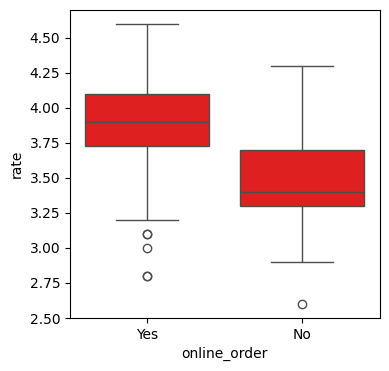

In [65]:
plt.figure(figsize = (4,4))
sns.boxplot(x='online_order', y='rate',data = data, color ='red')

#### conclusion - Online order recieves higher ratings in comparison to Offline orders

### (6) which type of restaurant receives more offline order?

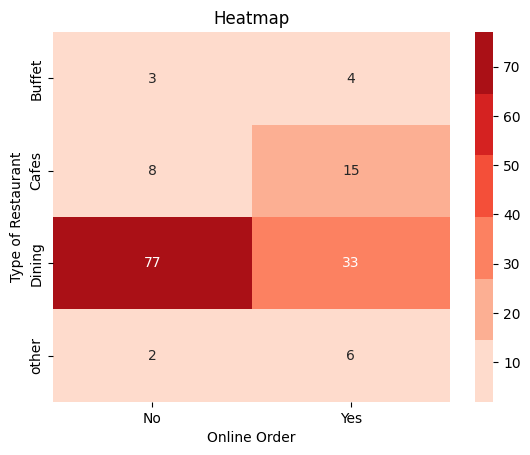

In [64]:
pivot_table = data.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc='size',
                               fill_value=0)
colormap = sns.color_palette("Reds")
sns.heatmap(pivot_table, annot=True ,cmap =colormap,fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Type of Restaurant")
plt.show()

#### conclusion- Dining restaurants receives more online and offline orders.